<a href="https://colab.research.google.com/github/ChowguleVivek/KNN1/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
boston = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
X = boston.drop('MEDV', axis = 1)

In [6]:
y = boston['MEDV']

In [7]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2424)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [14]:
from sklearn.preprocessing import StandardScaler # for normally distributed
#from sklearn.preprocessing import MinMaxScalar --> if distribution is not normal

In [15]:
ss = StandardScaler()

In [16]:
X_train = ss.fit_transform(X_train)

In [18]:
X_train

array([[ 0.85058491, -0.50198708,  1.05140988, ...,  0.81594236,
        -3.95291724,  1.84965832],
       [-0.23241259, -0.50198708, -0.40620296, ...,  1.19179609,
        -1.30160245,  1.09102599],
       [-0.41190842, -0.50198708, -1.00476085, ..., -0.87539945,
         0.39297522, -0.39839896],
       ...,
       [-0.41743886, -0.50198708, -0.83792564, ...,  0.81594236,
         0.34819028, -0.80068289],
       [-0.41373937, -0.50198708, -1.23745206, ..., -0.31161884,
         0.43588924, -0.42484669],
       [-0.41405765, -0.50198708, -1.12330165, ..., -0.7344543 ,
         0.26680565, -0.35246342]])

In [19]:
X_test = ss.fit_transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
knnreg = KNeighborsRegressor(n_neighbors=4)

In [35]:
knnreg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [36]:
y_pred = knnreg.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [38]:
mean_absolute_error(y_test, y_pred)

2.3470394736842106

In [39]:
mean_absolute_percentage_error(y_test, y_pred)

0.1213721794740712

In [31]:
error_rate = []
for i in range(1, 40):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(mean_absolute_error(y_test, pred_i))


In [32]:
error_rate

[2.5710526315789473,
 2.399342105263158,
 2.447149122807018,
 2.3470394736842106,
 2.45671052631579,
 2.594078947368421,
 2.5743421052631574,
 2.5323190789473684,
 2.6792397660818716,
 2.7544078947368424,
 2.7809210526315793,
 2.8372807017543864,
 2.894686234817814,
 2.9498590225563914,
 2.982587719298246,
 2.978453947368421,
 3.0005417956656344,
 2.9967836257309943,
 2.98898891966759,
 2.968815789473684,
 3.0075501253132835,
 3.0188098086124397,
 3.0494565217391303,
 3.0734375000000003,
 3.082105263157895,
 3.146002024291498,
 3.161135477582846,
 3.189708646616541,
 3.22239110707804,
 3.2891885964912277,
 3.328841256366723,
 3.350246710526316,
 3.3485845295055823,
 3.37796052631579,
 3.3811466165413533,
 3.415606725146199,
 3.445910384068279,
 3.4570983379501383,
 3.464760458839406]

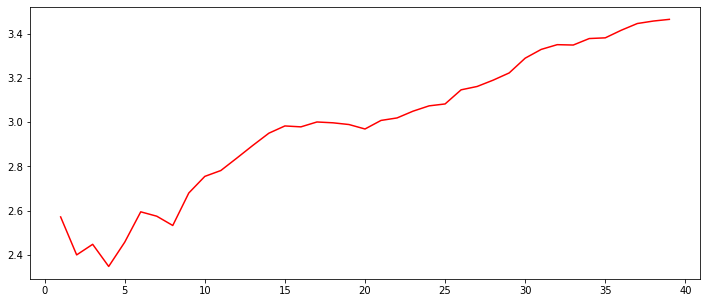

In [33]:
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot((range(1, 40)), error_rate, color = 'red')
plt.show()